# 使用K-means聚类算法实现鸢尾花聚类
对于给定样本集。按照样本之间的距离大小，将样本划分为k个类，让簇内的点尽量紧密的连在一起，而让簇剑距离尽可能大。

# 导入相关包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

# 加载数据集

In [2]:
iris = datasets.load_iris()

# 只是用前四个维度
# 忽略标签
X = iris.data[:, :4]

print(X.shape)

(150, 4)


# 绘制二维数据分布图
每个样本使用两个特征，绘制二维数据分布图

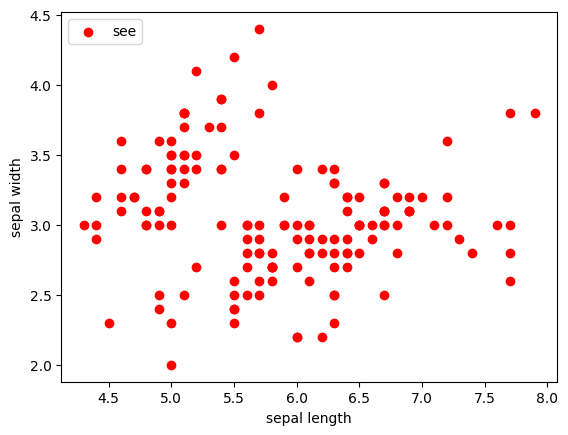

In [5]:
plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', label='see')
# 花萼长度
plt.xlabel('sepal length')
# 花萼宽度
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

# 实例化K-means类，并定义训练函数

In [9]:
# 实例化KMeans
def Model(n_clusters):
    # 初始化聚类器
    estimator = KMeans(n_clusters)
    return estimator


# 定义训练函数
def train(estimator: KMeans):
    estimator.fit(X)

# 训练

In [10]:
# 初始化聚类器
estimator = Model(3)

# 开启训练拟合
train(estimator)

G:\Anaconda3\envs\paddle\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
G:\Anaconda3\envs\paddle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 可视化展示

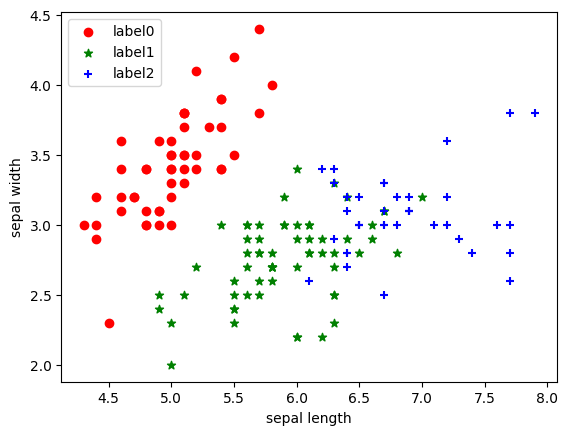

In [16]:
# 获取聚类标签
label_pred = estimator.labels_

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]

plt.scatter(x0[:, 0], x0[:, 1], c='red', marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c='green', marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c='blue', marker='+', label='label2')

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend(loc=2)
plt.show()

# 手写实现

cluster complete


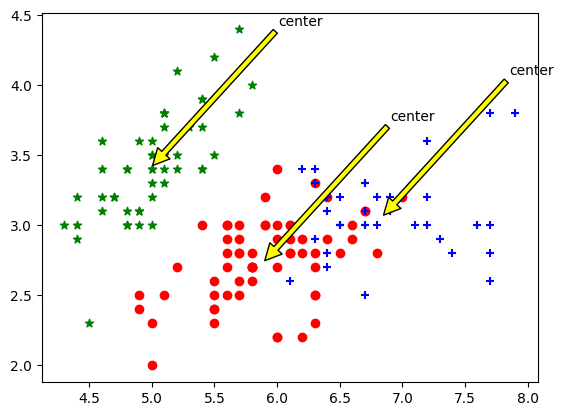

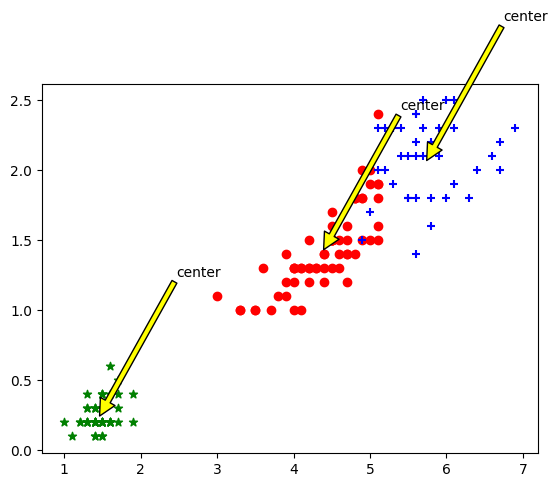

In [10]:
# 欧式距离计算
def dist_eclud(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


# 为给定数据集构建一个包含K个随机质心centroids的集合
def rand_cent(data_set, k):
    m, n = data_set.shape
    # 一共有k个中心点，每个中心点中有n个数据，及鸢尾花的四个元素
    centroids = np.zeros((k, n))
    # 随机生成k个质心
    for i in range(k):
        # 随机取数字
        index = int(np.random.uniform(0, m))
        # 将随机取到的index所对应的数据集中的数据赋值到中心点的数据
        centroids[i, :] = data_set[index, :]
    return centroids


# k均值聚类算法
def KMeans(data_set, k):
    # 统计数据集个数
    m = np.shape(data_set)[0]
    cluster_assment = np.mat(np.zeros((m, 2)))
    cluster_change = True

    # 1.初始化质心centroids
    centroids = rand_cent(data_set, k)

    while cluster_change:
        # 样本所属不再发生变化时停止迭代
        cluster_change = False

        # 遍历所有样本
        for i in range(m):
            min_dist = 100000.0
            min_index = -1

            # 2.遍历质心，寻找最近质心
            for j in range(k):
                # 计算样本到质心点的欧式距离，找到距离最近的那个
                distance = dist_eclud(centroids[j, :], data_set[i, :])
                if distance < min_dist:
                    min_dist = distance
                    min_index = j

            # 3.更新样本所属的簇
            if cluster_assment[i, 0] != min_index:
                cluster_change = True
                cluster_assment[i, :] = min_index, min_dist ** 2

        # 4.更新质心
        for j in range(k):
            # np.nonzero(x)返回值不为零的元素的下标，它的返回值是一个长度为x.ndim(x的轴数)的元组
            # 元组的每个元素都是一个整数数组，其值为非零元素的下标在对应轴上的值。
            # 矩阵名.A 代表将 矩阵转化为array数组类型

            # 这里取矩阵cluster_assment所有行的第一列，转为一个array数组，与j（簇类标签值）比较，返回true or false
            # 通过np.nonzero产生一个array，其中是对应簇类所有的点的下标值（x个）
            # 再用这些下标值求出dataSet数据集中的对应行，保存为pointsInCluster（x*4）
            points_in_cluster = data_set[np.nonzero(cluster_assment[:, 0].A == j)[0]]
            # 求均值，产生新质心
            centroids[j, :] = np.mean(points_in_cluster, axis=0)

    print("cluster complete")
    return centroids, cluster_assment


def draw(data, center, assment):
    length = len(center)
    fig = plt.figure
    data1 = data[np.nonzero(assment[:, 0].A == 0)[0]]
    data2 = data[np.nonzero(assment[:, 0].A == 1)[0]]
    data3 = data[np.nonzero(assment[:, 0].A == 2)[0]]
    # 选取前两个维度绘制原始数据的散点图
    plt.scatter(data1[:, 0], data1[:, 1], c="red", marker='o', label='label0')
    plt.scatter(data2[:, 0], data2[:, 1], c="green", marker='*', label='label1')
    plt.scatter(data3[:, 0], data3[:, 1], c="blue", marker='+', label='label2')
    # 绘制簇的质心点
    for i in range(length):
        plt.annotate('center', xy=(center[i, 0], center[i, 1]), xytext= \
            (center[i, 0] + 1, center[i, 1] + 1), arrowprops=dict(facecolor='yellow'))
        #  plt.annotate('center',xy=(center[i,0],center[i,1]),xytext=\
        # (center[i,0]+1,center[i,1]+1),arrowprops=dict(facecolor='red'))
    plt.show()

    # 选取后两个维度绘制原始数据的散点图
    plt.scatter(data1[:, 2], data1[:, 3], c="red", marker='o', label='label0')
    plt.scatter(data2[:, 2], data2[:, 3], c="green", marker='*', label='label1')
    plt.scatter(data3[:, 2], data3[:, 3], c="blue", marker='+', label='label2')
    # 绘制簇的质心点
    for i in range(length):
        plt.annotate('center', xy=(center[i, 2], center[i, 3]), xytext= \
            (center[i, 2] + 1, center[i, 3] + 1), arrowprops=dict(facecolor='yellow'))
    plt.show()


dataSet = X
k = 3
centroids, cluster_assment = KMeans(dataSet, k)
draw(dataSet, centroids, cluster_assment)